# Задание 1

#### Случайная величина X - число правильных ответов. Она распределена по биномиальному закону. n=5 - число вопросов, p=1/4 вероятность угадать ответ.

#### Формула Бернули в данном случае выглядит следующим образом: P(X=k) = C(n,k) * p^k * (1-p)^(n-k) = C(5, k) * 0.25^k * 0.75^(5-k)

In [5]:
from scipy import special as spc
def C_n_k(n, k):
    return spc.factorial(n) / (spc.factorial(k) * spc.factorial(n-k))

In [19]:
def calc_bin_prob(number_of_rights):
    return C_n_k(5, number_of_rights) * (0.25 ** number_of_rights) * (0.75 ** (5 - number_of_rights))

In [22]:
distr = [(k, calc_bin_prob(k)) for k in range(6)]
print(distr)

[(0, 0.2373046875), (1, 0.3955078125), (2, 0.263671875), (3, 0.087890625), (4, 0.0146484375), (5, 0.0009765625)]


#### характеристики распределения M(X) = np = 5/4; D(X) = np(1-p) = 5/4 * 3/4 = 15/16

# Задание 2

#### В данном случае вероятность получить N писем со спамом распделена по закону Пуасона.Заданим функцию:

In [28]:
import math
def puasson(l, k):
    return (l ** k) * (math.e ** -l) / spc.factorial(k)

#### l = M(x) = 10

#### вероятность получить не более N писем со спамом - сумма по k от 0 до N. Зададим формулу.

In [45]:
import numpy as np
def calc_puasson_prob(l, n):
    probs = [puasson(l, i) for i in range(n+1)]
    return np.array(probs).sum()

#### Найдем требуемое N подбором

In [46]:
[(i, calc_puasson_prob(10, i)) for i in range(20)]

[(0, 4.5399929762484875e-05),
 (1, 0.0004993992273873337),
 (2, 0.002769395715511577),
 (3, 0.010336050675925723),
 (4, 0.02925268807696109),
 (5, 0.06708596287903182),
 (6, 0.13014142088248304),
 (7, 0.22022064660169907),
 (8, 0.3328196787507191),
 (9, 0.4579297144718525),
 (10, 0.5830397501929858),
 (11, 0.696776146303107),
 (12, 0.7915564763948747),
 (13, 0.8644644226193114),
 (14, 0.9165415270653376),
 (15, 0.9512595966960218),
 (16, 0.9729583902151994),
 (17, 0.9857223864029508),
 (18, 0.9928134953961462),
 (19, 0.9965456580241436)]

#### Искомое N = 15

# Задание 3

#### В данном случае иммеем биномиальное распределение. Однако учитывая малую вероятность попадания и количество требуемых попаданий, можно предположить, что n будет достаточно велико, что позволяет апроксимировать распределение распределением Пуассона

#### P(X>=k) = 1 - P(X<k) = 1 - sum(calc_puasson_prob(l, i)), где l = n * p = n * 0.01

#### Таким образом имеем равенство 0.01 = sum(calc_puasson_prob(n * 0.01, i). Задаим функцию вычисляющую правую часть

In [48]:
def calc_right_part(n):
    l = n * 0.01
    probs = [puasson(l, i) for i in range(5)]
    return np.array(probs).sum()

#### Построим график зависимости от n:

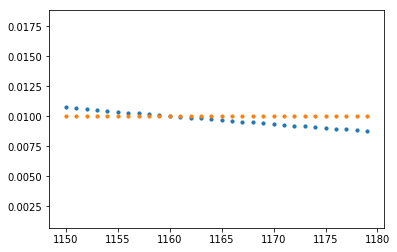

In [67]:
ns = range(1150, 1180)
right = []
left = []
for n in ns:
    right.append(calc_right_part(n))
    left.append(0.01)

from matplotlib import pyplot as plt
plt.scatter(ns, right, s=10)
plt.scatter(ns, left, s=10)
plt.show()

In [68]:
[(i, calc_right_part(i)) for i in range(1150, 1180)]

[(1150, 0.010746578383282804),
 (1151, 0.010672995305144886),
 (1152, 0.010599890775952163),
 (1153, 0.010527261902552605),
 (1154, 0.010455105807380453),
 (1155, 0.01038341962838913),
 (1156, 0.010312200518984184),
 (1157, 0.010241445647956454),
 (1158, 0.01017115219941536),
 (1159, 0.010101317372722284),
 (1160, 0.010031938382424142),
 (1161, 0.009963012458187046),
 (1162, 0.009894536844730151),
 (1163, 0.009826508801759642),
 (1164, 0.00975892560390279),
 (1165, 0.00969178454064226),
 (1166, 0.009625082916250489),
 (1167, 0.009558818049724246),
 (1168, 0.009492987274719339),
 (1169, 0.009427587939485435),
 (1170, 0.009362617406801072),
 (1171, 0.009298073053908843),
 (1172, 0.00923395227245064),
 (1173, 0.00917025246840314),
 (1174, 0.00910697106201342),
 (1175, 0.00904410548773472),
 (1176, 0.00898165319416236),
 (1177, 0.00891961164396984),
 (1178, 0.00885797831384506),
 (1179, 0.008796750694426734)]

#### Искомое N = 1160